In [1]:
# Data processing
import pandas as pd
import numpy as np

# Stat tools 
from scipy import stats

# Data visualization interactive 
# pip install plotly in env
# "jupyter labextension install jupyterlab-plotly" in terminal for base env

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps

%matplotlib inline

In [2]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [3]:
data = pd.read_parquet('data_features.parquet.gzip') 

In [4]:
data.to_csv('data.csv', index=False)

In [5]:
data.head(2)

,price,tag_seller,tag_condition,storage_gb,neverlock,loan,installment_loan,guarantee,color_black,color_rose,...,color_red,chargin_adapter,wire,box,case,glass,earphones,discount,time_exec_pub,time_seller_reg
0,5899.00,1,0,32,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,2.0,1608.0
1,5594.86,1,0,32,0,0,0,1,1,1,...,0,0,1,0,0,0,0,0,2.0,1669.0


## **Baseline with mean target price**

In [6]:
data['y_pred'] = data.price.mean()

In [7]:
from sklearn.metrics import mean_absolute_error

In [8]:
print('MAE of baseline model:', mean_absolute_error(data.y_pred, data.price))

MAE of baseline model: 1449.0594178988028


In [9]:
data.head(2)

,price,tag_seller,tag_condition,storage_gb,neverlock,loan,installment_loan,guarantee,color_black,color_rose,...,chargin_adapter,wire,box,case,glass,earphones,discount,time_exec_pub,time_seller_reg,y_pred
0,5899.00,1,0,32,0,1,0,0,1,1,...,0,0,0,0,0,0,0,2.0,1608.0,4723.021705
1,5594.86,1,0,32,0,0,0,1,1,1,...,0,1,0,0,0,0,0,2.0,1669.0,4723.021705


## **Data spliting**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = data.drop(['price','y_pred'], axis=1)
Y = data.price

In [12]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

## **Pearson correlation**

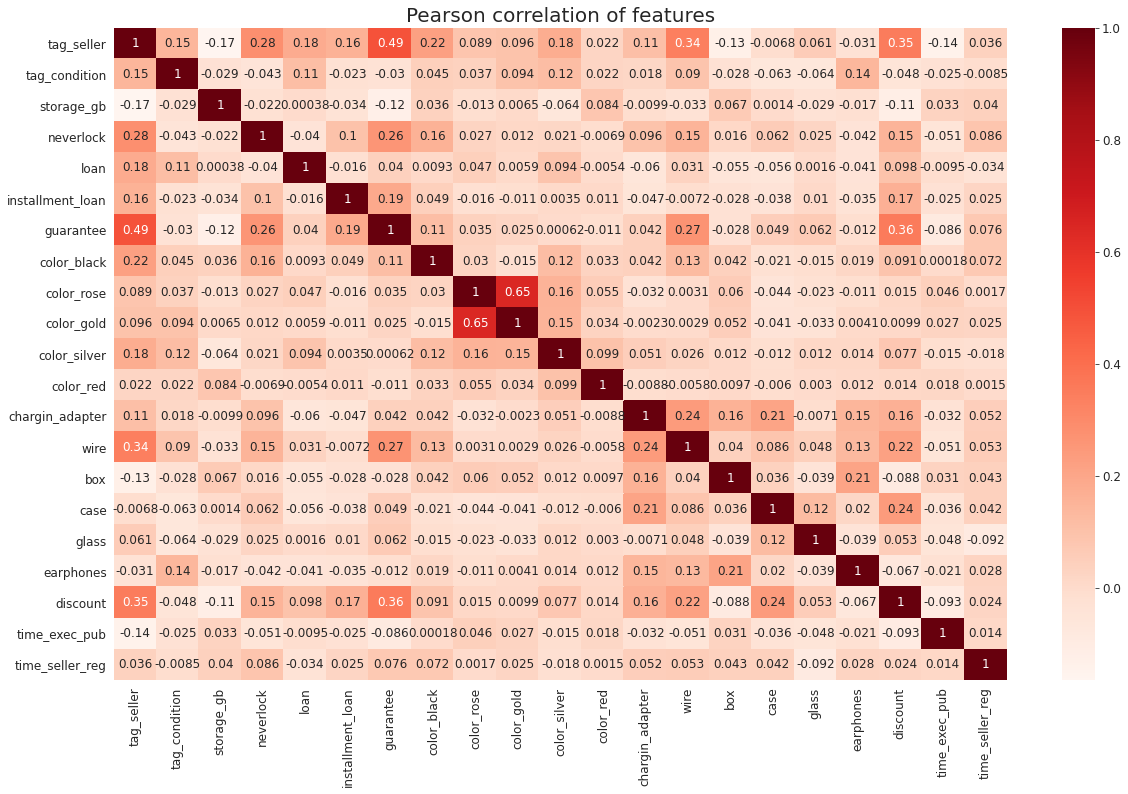

In [13]:
# Show the correlation in our dataset
plt.figure(figsize=(20,12))
cor = train_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Pearson correlation of features', fontsize=20)
plt.show()

## **Crammers V correlation**

In [14]:
data_encoded = train_x.drop(['storage_gb','time_exec_pub','time_seller_reg'],axis=1)

In [15]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [16]:
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,tag_seller,tag_condition,neverlock,loan,installment_loan,guarantee,color_black,color_rose,color_gold,color_silver,color_red,chargin_adapter,wire,box,case,glass,earphones,discount
tag_seller,1.00,0.02,0.08,0.03,0.02,0.24,0.05,0.01,0.01,0.03,0.00,0.01,0.12,0.02,0.00,0.00,0.00,0.12
tag_condition,0.02,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00
neverlock,0.08,0.00,1.00,0.00,0.01,0.07,0.03,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,0.02
loan,0.03,0.01,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
installment_loan,0.02,0.00,0.01,0.00,1.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03
guarantee,0.24,0.00,0.07,0.00,0.04,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.13
color_black,0.05,0.00,0.03,0.00,0.00,0.01,1.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01
color_rose,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.42,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
color_gold,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.42,1.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
color_silver,0.03,0.01,0.00,0.01,0.00,0.00,0.01,0.02,0.02,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01


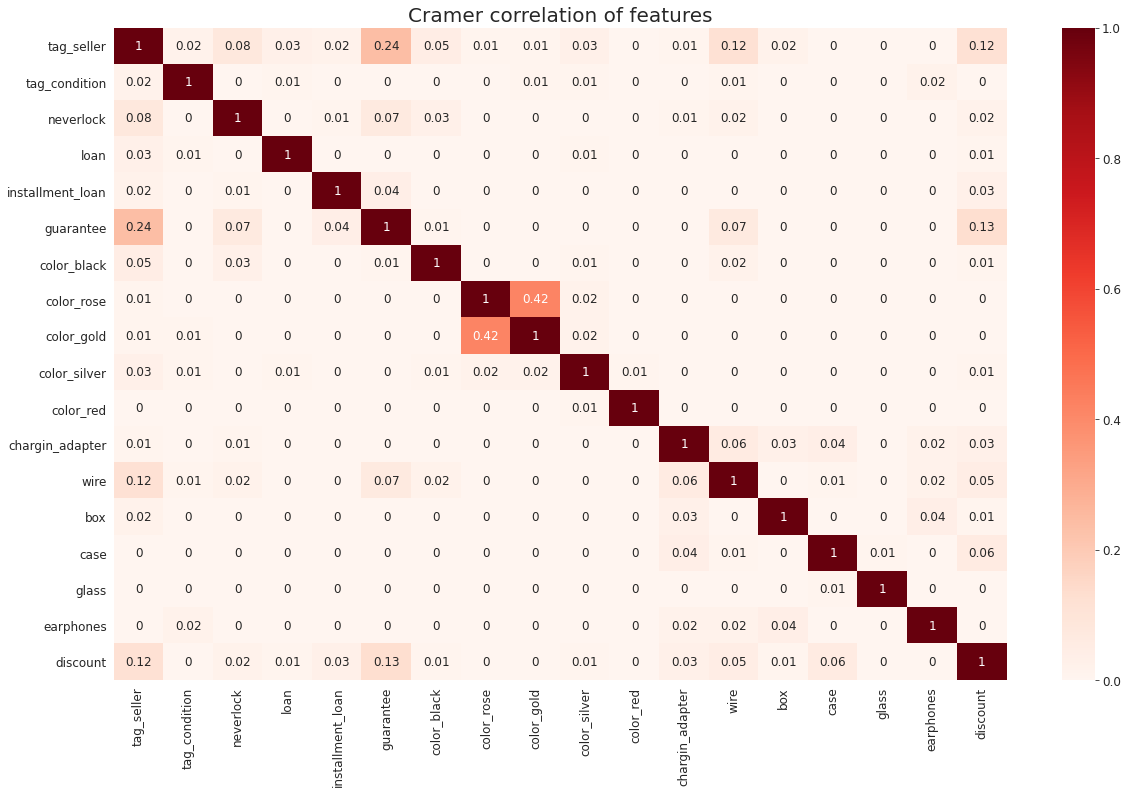

In [17]:
# Show the correlation in our dataset
plt.figure(figsize=(20,12))
sns.heatmap(df, annot=True, cmap=plt.cm.Reds)
plt.title('Cramer correlation of features', fontsize=20)
plt.show()

## **Power Prediction score**

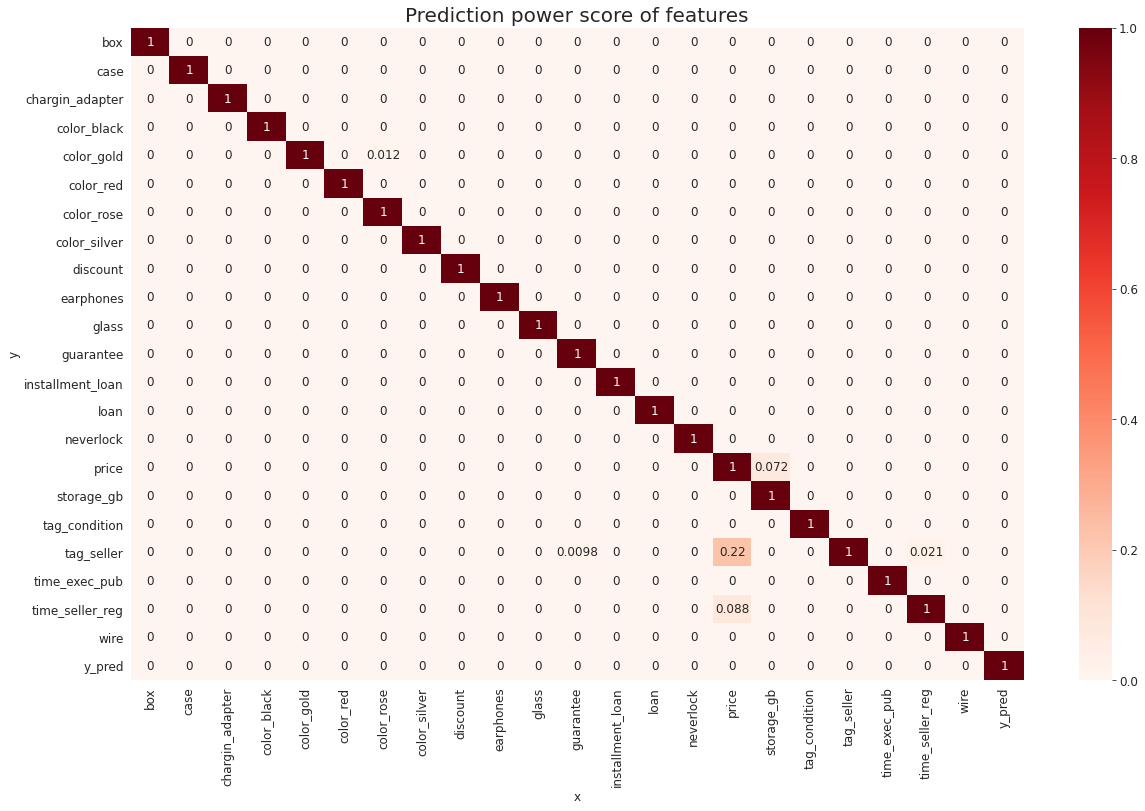

In [220]:
# matrix_df = pps.matrix(data.drop(['y_pred'], axis=1))[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

matrix_df = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Show the prediction power score in our dataset
plt.figure(figsize=(20,12))
sns.heatmap(matrix_df, annot=True, cmap=plt.cm.Reds)
plt.title('Prediction power score of features', fontsize=20)
plt.show()

## **Outliers filtering**

### *3 $sigma$*

In [19]:
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))  

In [20]:
def mad_outlier(y, thresh=3.):
    '''
    compute outliers based on mad
    # args
        y: assumed to be array with shape (N,1)
        thresh: float()
    # returns
        array index of outliers
    '''
    median = np.median(y)
    diff = np.sum((y - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [21]:
mad = mad_outlier(data.price.values.reshape(-1,1))

In [22]:
anomalies_report(mad)

Total number of outliers: 621
Percentage of outliers:   3.30%


### *DBSCAN*

In [23]:
from sklearn.preprocessing import RobustScaler

In [24]:
data_features = X
labeled_data = data_features.copy()

In [25]:
scaler = RobustScaler()

scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
)

In [26]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:    
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    
model = DBSCAN(eps)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [27]:
anomalies_report(density_outlier)

Total number of outliers: 915
Percentage of outliers:   4.86%


### *SVM*

In [28]:
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.1, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [29]:
anomalies_report(svm_outliers)

Total number of outliers: 1878
Percentage of outliers:   9.98%


### *Isolation forest*

In [30]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, 
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [31]:
anomalies_report(isolation_outliers)

Total number of outliers: 1882
Percentage of outliers:   10.00%


### *Combined*

In [32]:
summary = np.concatenate((
    [density_outlier],
    [svm_outliers],
    [isolation_outliers]
))

In [33]:
summary = pd.DataFrame(
    summary.T, 
    columns=['dbscan', 'svm', 'isolation']
)
summary.head()

,dbscan,svm,isolation
0,0,0,1
1,0,0,0
2,0,1,0
3,0,1,1
4,0,0,1


In [34]:
outlier_score = summary.mean(axis=1)
simple_score = outlier_score.apply(lambda x: 0 if x < 0.4 else 0.5 if x < 0.8 else 1)
labeled_data['outlier_score'] = simple_score

0    15433
1     2216
2     1054
3      117
dtype: int64

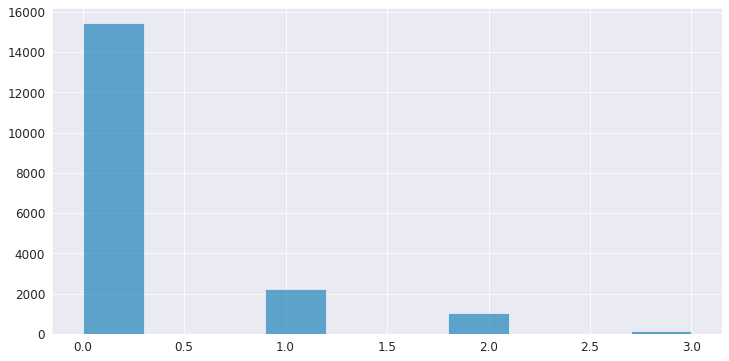

In [35]:
outliers_score_model_based = summary[['dbscan', 'svm', 'isolation']].sum(axis=1)
plt.hist(outliers_score_model_based, alpha=0.6);
outliers_score_model_based.value_counts()

In [36]:
other_features = data_features.columns

In [37]:
clean_index = labeled_data[labeled_data.outlier_score.isin([0])].index

In [38]:
X.iloc[clean_index]

,tag_seller,tag_condition,storage_gb,neverlock,loan,installment_loan,guarantee,color_black,color_rose,color_gold,...,color_red,chargin_adapter,wire,box,case,glass,earphones,discount,time_exec_pub,time_seller_reg
0,1,0,32,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,2.0,1608.0
1,1,0,32,0,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,2.0,1669.0
2,1,0,32,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,17.0,2673.0
4,1,0,32,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0.0,1424.0
5,1,0,32,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,7.0,1697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19037,0,0,128,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,1129.0
19038,0,0,32,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,521.0
19039,0,0,128,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,3.0
19040,0,0,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,398.0


In [39]:
X_clean = X.iloc[clean_index]
Y_clean = Y.iloc[clean_index]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = data.drop(['price','y_pred'], axis=1)
Y = data.price

In [42]:
train_x, test_x, train_y, test_y = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

### **Multiple models testing**

In [43]:
# Let's import all necessary models
import time
import xgboost as xgb
import lightgbm as lgb 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [44]:
def mae_compare(model):
    model.fit(train_x, train_y)
    y_pred = model.predict(test_x)
    return mean_absolute_error(y_pred, test_y)

In [45]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), XGBRegressor(), LGBMRegressor()]

for model in models:
    result = mae_compare(model)
    print(f'{model.__class__.__name__}: \t{result}\n')

LinearRegression: 	1506.208879975005

Ridge: 	1505.9272345688237

Lasso: 	1504.5081272480375

ElasticNet: 	1496.4321249564032

RandomForestRegressor: 	735.3230457561674

XGBRegressor: 	1025.9278912087536

LGBMRegressor: 	1134.3348246750234



/home/fantast/anaconda3/envs/coursera/lib/python3.9/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


#### **XGB Regression**

In [174]:
num_estimetor = [2, 5, 10, 20, 50, 100, 200, 300]

cv_xgbr = []
cv_xgbr_time = []

print('XGB Regression \n')

for n in num_estimetor:
    time_start = time.time()
    cv_temp = mae_compare(XGBRegressor(n_estimators=n))
    cv_xgbr.append(cv_temp)
    time_end = time.time()
    time_res = time_end - time_start
    cv_xgbr_time.append(time_res)
    
    print(f'Number of estimators: {n} \t MAE = {cv_temp} \t Time = {time_res}\n')

XGB Regression 

Number of estimators: 2 	 MAE = 2574.0725525800895 	 Time = 0.05730748176574707

Number of estimators: 5 	 MAE = 1411.6242913958347 	 Time = 0.08869504928588867



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Number of estimators: 10 	 MAE = 1224.34075541925 	 Time = 0.07744574546813965



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Number of estimators: 20 	 MAE = 1188.8753879316137 	 Time = 0.46553492546081543



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Number of estimators: 50 	 MAE = 1113.994609313405 	 Time = 0.7072956562042236



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Number of estimators: 100 	 MAE = 1025.9278912087536 	 Time = 1.2038066387176514



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Number of estimators: 200 	 MAE = 954.9950554288637 	 Time = 1.1787855625152588

Number of estimators: 300 	 MAE = 921.6920924873964 	 Time = 1.4387834072113037



Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


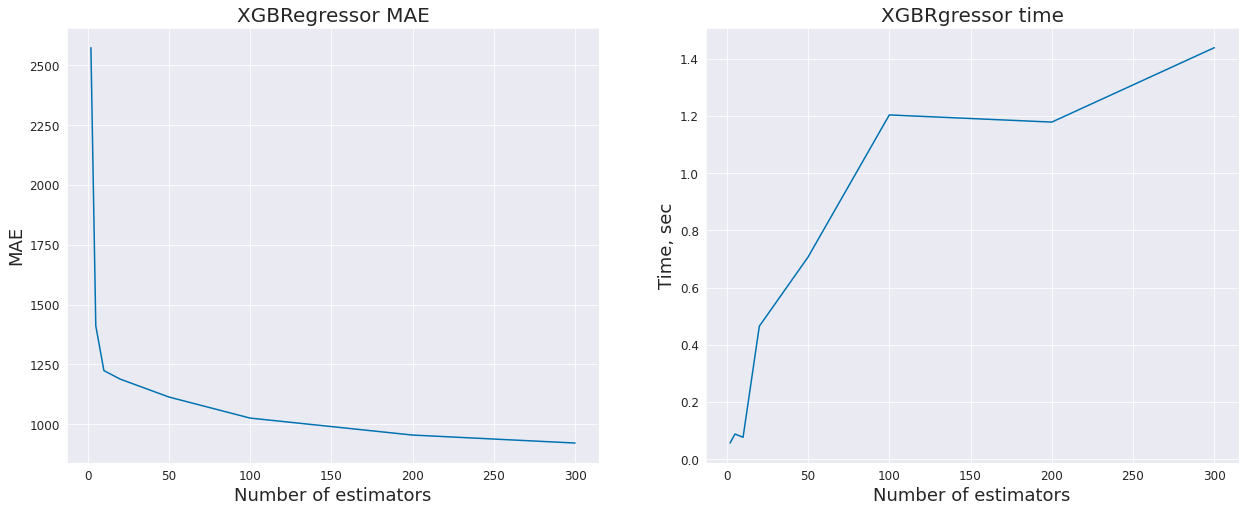

In [175]:
cv_xgbr_df = pd.Series(cv_xgbr, index=num_estimetor)
cv_xgbr_time_df = pd.Series(cv_xgbr_time, index=num_estimetor)

fig, axes = plt.subplots(1, 2, figsize =(21,8))

cv_xgbr_df.plot(ax=axes[0])
axes[0].set_xlabel('Number of estimators', fontsize=18)
axes[0].set_ylabel('MAE', fontsize=18)
axes[0].set_title('XGBRegressor MAE', fontsize=20)

cv_xgbr_time_df.plot(ax=axes[1])
axes[1].set_xlabel('Number of estimators', fontsize=18)
axes[1].set_ylabel('Time, sec', fontsize=18)
axes[1].set_title('XGBRgressor time', fontsize=20)

plt.show()

In [176]:
base_xgb = XGBRegressor(n_estimators=300)

In [177]:
base_xgb.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [178]:
xgb_pred = base_xgb.predict(test_x)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [179]:
mean_absolute_error(train_y, base_xgb.predict(train_x))

462.3996642528958

In [180]:
mean_absolute_error(test_y,xgb_pred)

921.6920924873964

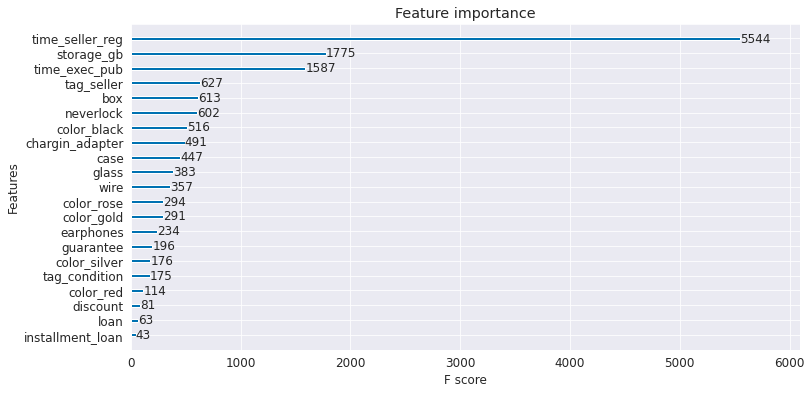

In [181]:
xgb.plot_importance(base_xgb);

In [54]:
import shap

2021-10-04 09:07:21.975766: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


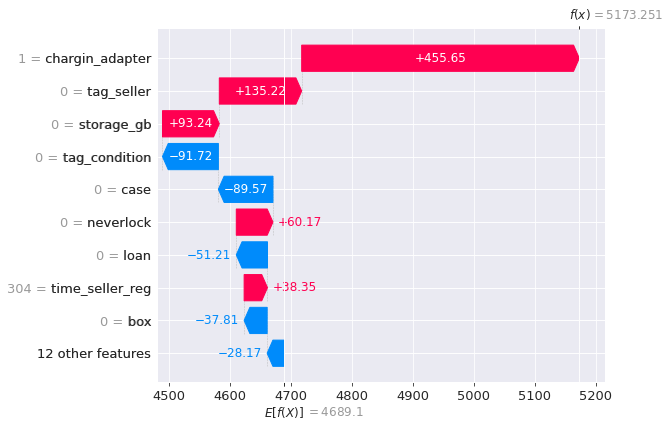

In [55]:
explainer = shap.Explainer(base_xgb)
shap_values = explainer(train_x)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

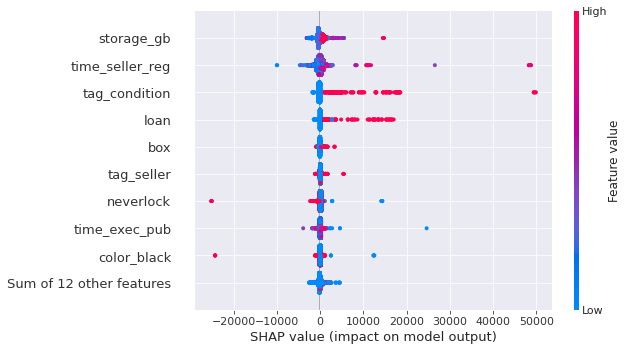

In [56]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

We can also just take the mean absolute value of the SHAP values for each feature to get a standard bar plot (produces stacked bars for multi-class outputs):

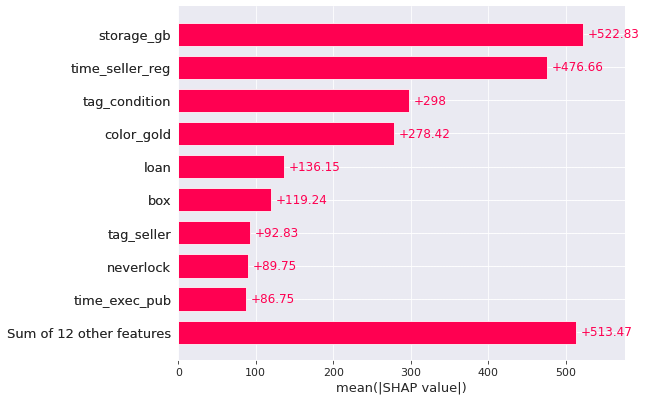

In [57]:
shap.plots.bar(shap_values)

In [58]:
mean_absolute_error(train_y, base_xgb.predict(train_x))

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


462.3996642528958

In [59]:
mean_absolute_error(test_y, base_xgb.predict(test_x))

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


921.6920924873964

In [60]:
import joblib
# joblib.dump(value=base_xgb, filename='outputs/sklearn_mnist_model.pkl')
joblib.dump(value=base_xgb, filename='xgboost_model.pkl')

['xgboost_model.pkl']

#### **Random Forest Regression**

In [182]:
num_estimetor = [2, 5, 10, 20, 50, 100, 200]

cv_random_forest = []
cv_random_forest_time = []

print('Random Forest Regression \n')

for n in num_estimetor:
    time_start = time.time()
    cv_temp = mae_compare(RandomForestRegressor(n_estimators=n))
    cv_random_forest.append(cv_temp)
    time_end = time.time()
    time_res = time_end - time_start
    cv_random_forest_time.append(time_res)
    
    print(f'Number of estimators: {n} \t MAE = {cv_temp} \t Time = {time_res}\n')

Random Forest Regression 

Number of estimators: 2 	 MAE = 805.9439497801987 	 Time = 0.1022481918334961

Number of estimators: 5 	 MAE = 785.9049377939784 	 Time = 0.1983017921447754

Number of estimators: 10 	 MAE = 758.5856069638885 	 Time = 0.36141037940979004

Number of estimators: 20 	 MAE = 737.9279480374238 	 Time = 0.68558669090271

Number of estimators: 50 	 MAE = 739.4023478413228 	 Time = 1.5958976745605469

Number of estimators: 100 	 MAE = 735.3409558526967 	 Time = 3.147327423095703

Number of estimators: 200 	 MAE = 741.4584310086473 	 Time = 6.315615892410278



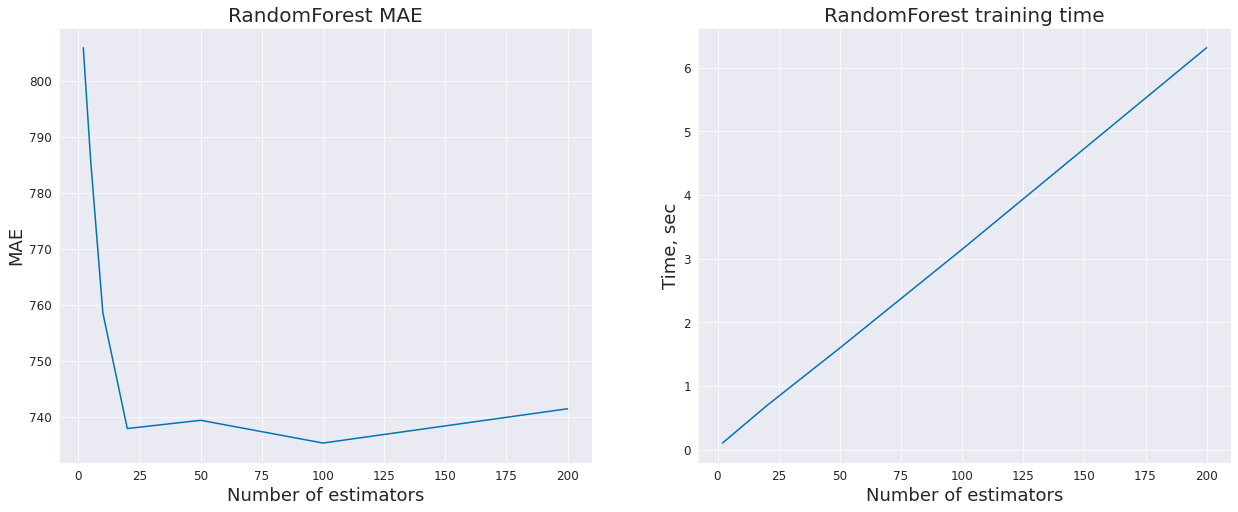

In [183]:
cv_random_forest_df = pd.Series(cv_random_forest, index=num_estimetor)
cv_random_forest_time_df = pd.Series(cv_random_forest_time, index=num_estimetor)

fig, axes = plt.subplots(1, 2, figsize =(21,8))

cv_random_forest_df.plot(ax=axes[0])
axes[0].set_xlabel('Number of estimators', fontsize=18)
axes[0].set_ylabel('MAE', fontsize=18)
axes[0].set_title('RandomForest MAE', fontsize=20)

cv_random_forest_time_df.plot(ax=axes[1])
axes[1].set_xlabel('Number of estimators', fontsize=18)
axes[1].set_ylabel('Time, sec', fontsize=18)
axes[1].set_title('RandomForest training time', fontsize=20)

plt.show()

In [184]:
base_rfr = RandomForestRegressor(n_estimators=100)

In [185]:
base_rfr.fit(train_x,train_y)

RandomForestRegressor()

In [186]:
rfr_pred = base_rfr.predict(test_x)

In [187]:
mean_absolute_error(train_y, base_xgb.predict(train_x))

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


462.3996642528958

In [188]:
mean_absolute_error(test_y, rfr_pred)

739.8158133609019

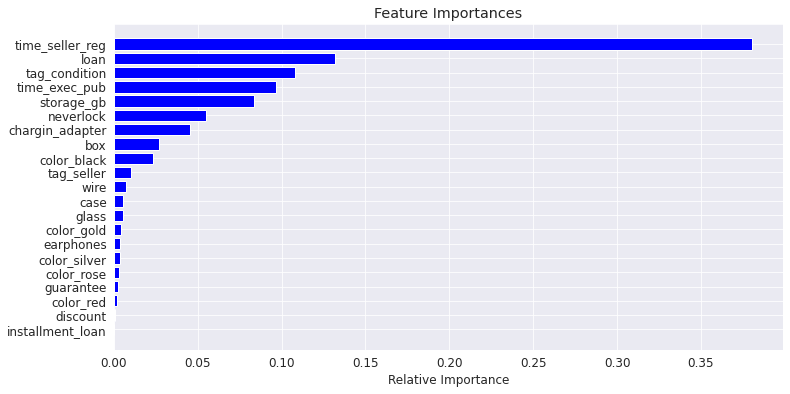

In [189]:
features = test_x.columns
importances = base_rfr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [190]:
mean_absolute_error(train_y, base_rfr.predict(train_x))

278.212729556916

In [191]:
mean_absolute_error(test_y, base_rfr.predict(test_x))

739.8158133609019

### **E) MAPE calculation**

In [192]:
import numpy as np

EPSILON = 1e-10

In [216]:
mape_df.shape

(3488, 2)

In [197]:
def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.mean(np.abs((actual - predicted) / (actual + EPSILON))))

In [198]:
def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))

In [214]:
mape_df = test_y.to_frame()

#### XGBoost MAPE and MAAPE

In [207]:
pred_xgb = base_xgb.predict(test_x)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


In [215]:
mape_df['pred_price'] = pred_xgb

In [217]:
mape_df = mape_df[mape_df.price > 0]

In [212]:
mape(mape_df.price, mape_df.pred_price)

0.2512896670429509

In [213]:
maape(mape_df.price, mape_df.pred_price)

0.16487737787456674

#### Random Forest Regression MAPE and MAAPE

In [208]:
pred_rfr = base_rfr.predict(test_x)

In [215]:
mape_df['pred_price'] = pred_rfr

In [217]:
mape_df = mape_df[mape_df.price > 0]

In [218]:
mape(mape_df.price, mape_df.pred_price)

0.1842609464135289

In [219]:
maape(mape_df.price, mape_df.pred_price)

0.13161418544646103

### **E) Variation Inflation Factor**

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [167]:
df = train_x

In [168]:
# We have to add constant to dataframe as it is necessary for VIF model
X = df.assign(const=1)


pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

tag_seller          1.707541
tag_condition       1.068501
storage_gb          1.059888
neverlock           1.137719
loan                1.074968
installment_loan    1.037792
guarantee           1.399954
color_black         1.089144
color_rose          1.680951
color_gold          1.710612
color_silver        1.037317
color_red           1.020190
chargin_adapter     1.138488
wire                1.205370
box                 1.103483
case                1.114044
glass               1.043895
earphones           1.079530
discount            1.235113
time_exec_pub       1.033068
time_seller_reg     1.020091
const               7.411145
dtype: float64

### **E) Best model prediction**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_grid = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [100]}

In [ ]:
# Random search of parameters
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = rf_grid, 
                               n_iter = 100, 
                               cv = None, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)# Fit the random search model

In [ ]:
rf_best = rf_random.best_estimator_

In [ ]:
rf_best = RandomForestRegressor( criterion='mae',
                                 n_estimators=300,
                                 min_samples_split= 2,
                                 min_samples_leaf= 1,
                                 max_features='auto',
                                 max_depth= 10,
                                 bootstrap= True)

In [ ]:
rf_best = RandomForestRegressor( criterion='mae',
                                 n_estimators=300)

In [ ]:
rf_best.fit(train_x, train_y)

In [ ]:
mean_absolute_error(train_y, rf_best.predict(train_x))

In [ ]:
mean_absolute_error(test_y, rf_best.predict(test_x))

In [1]:
from sklearn.externals import joblib

# now you can save it to a file
joblib.dump(clf, 'xgb_model.pkl') 

# and later you can load it
clf = joblib.load('xgb_model.pkl')

ModuleNotFoundError: No module named 'cPickle'